<a href="https://colab.research.google.com/github/Nikhil199727/Spotify-Data-Analysis/blob/main/Spotify_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# import the libraries
import pandas as pd
import numpy as np# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_spotify = pd.read_csv('data.csv')

In [ ]:
df_spotify.head( )

,id,name,artists,duration_ms,release_date,year,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,mode,key,popularity,explicit
0,6KbQ3uYMLKb5jDxLF7wYDD,Singende Bataillone 1. Teil,['Carl Woitschach'],158648,1928,1928,0.995,0.708,0.1950,0.563,0.1510,-12.428,0.0506,118.469,0.7790,1,10,0,0
1,6KuQTIu1KoTTkLXKrwlLPV,"Fantasiestücke, Op. 111: Più tosto lento","['Robert Schumann', 'Vladimir Horowitz']",282133,1928,1928,0.994,0.379,0.0135,0.901,0.0763,-28.454,0.0462,83.972,0.0767,1,8,0,0
2,6L63VW0PibdM1HDSBoqnoM,Chapter 1.18 - Zamek kaniowski,['Seweryn Goszczyński'],104300,1928,1928,0.604,0.749,0.2200,0.000,0.1190,-19.924,0.9290,107.177,0.8800,0,5,0,0
3,6M94FkXd15sOAOQYRnWPN8,Bebamos Juntos - Instrumental (Remasterizado),['Francisco Canaro'],180760,9/25/28,1928,0.995,0.781,0.1300,0.887,0.1110,-14.734,0.0926,108.003,0.7200,0,1,0,0
4,6N6tiFZ9vLTSOIxkj8qKrd,"Polonaise-Fantaisie in A-Flat Major, Op. 61","['Frédéric Chopin', 'Vladimir Horowitz']",687733,1928,1928,0.990,0.210,0.2040,0.908,0.0980,-16.829,0.0424,62.149,0.0693,1,11,1,0


In [ ]:
df_spotify.isna().sum()

,0
id,0
name,0
artists,0
duration_ms,0
release_date,0
year,0
acousticness,0
danceability,0
energy,0
instrumentalness,0


In [ ]:
df_spotify.duplicated().sum()

0

In [ ]:
df_spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169909 entries, 0 to 169908
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                169909 non-null  object 
 1   name              169909 non-null  object 
 2   artists           169909 non-null  object 
 3   duration_ms       169909 non-null  int64  
 4   release_date      169909 non-null  object 
 5   year              169909 non-null  int64  
 6   acousticness      169909 non-null  float64
 7   danceability      169909 non-null  float64
 8   energy            169909 non-null  float64
 9   instrumentalness  169909 non-null  float64
 10  liveness          169909 non-null  float64
 11  loudness          169909 non-null  float64
 12  speechiness       169909 non-null  float64
 13  tempo             169909 non-null  float64
 14  valence           169909 non-null  float64
 15  mode              169909 non-null  int64  
 16  key               16

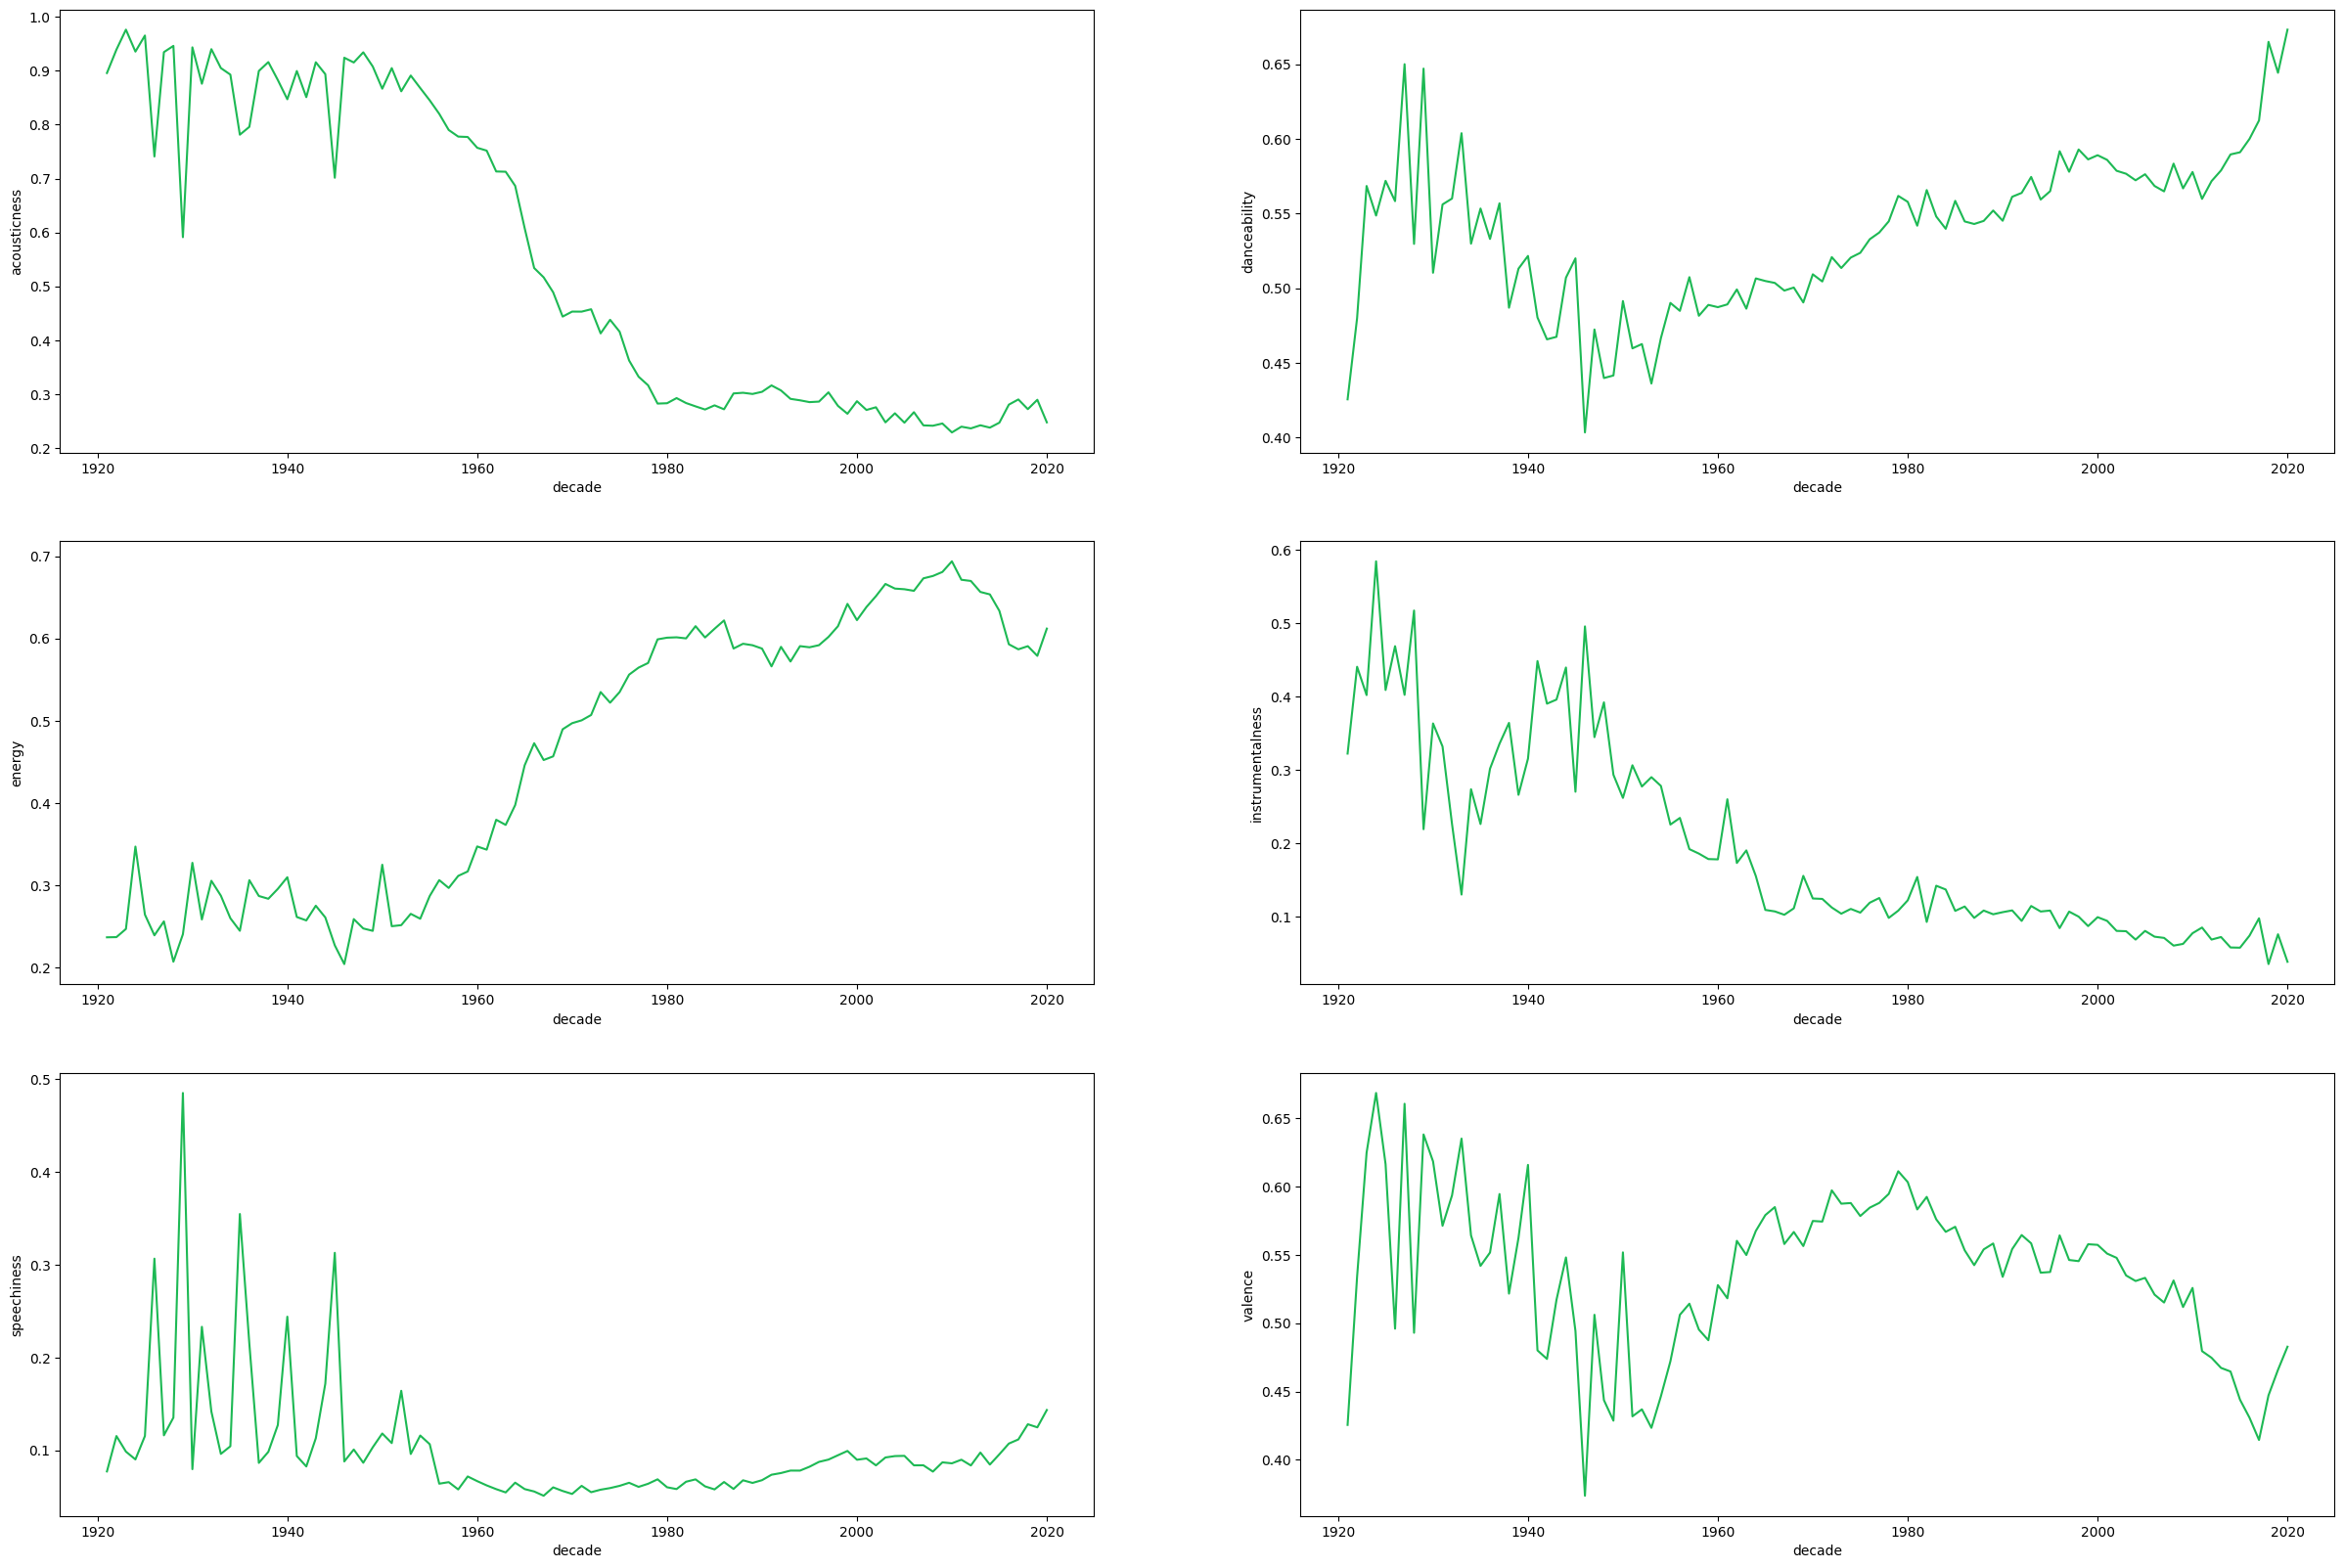

In [ ]:
p1, elements = plt.subplots(3, 2) # Initiate the subplots

arrElements = ["acousticness", "danceability", "energy", "instrumentalness", "speechiness", "valence"]
row = 0
col = 0

for elem in arrElements: # Produce a line graph for each musical element
    df_spotify.groupby("year")[elem].mean().plot(ax=elements[row][col], figsize=(30,20), color="#1db954") # Group rows by year and get the mean values for that particular element
    elements[row][col].set_xlabel("decade")
    elements[row][col].set_ylabel(elem)
    if col == 0:
        col = 1
    elif row == 0 and col == 1:
        row = 1
        col = 0
    elif row == 1 and col == 1:
        row = 2
        col = 0

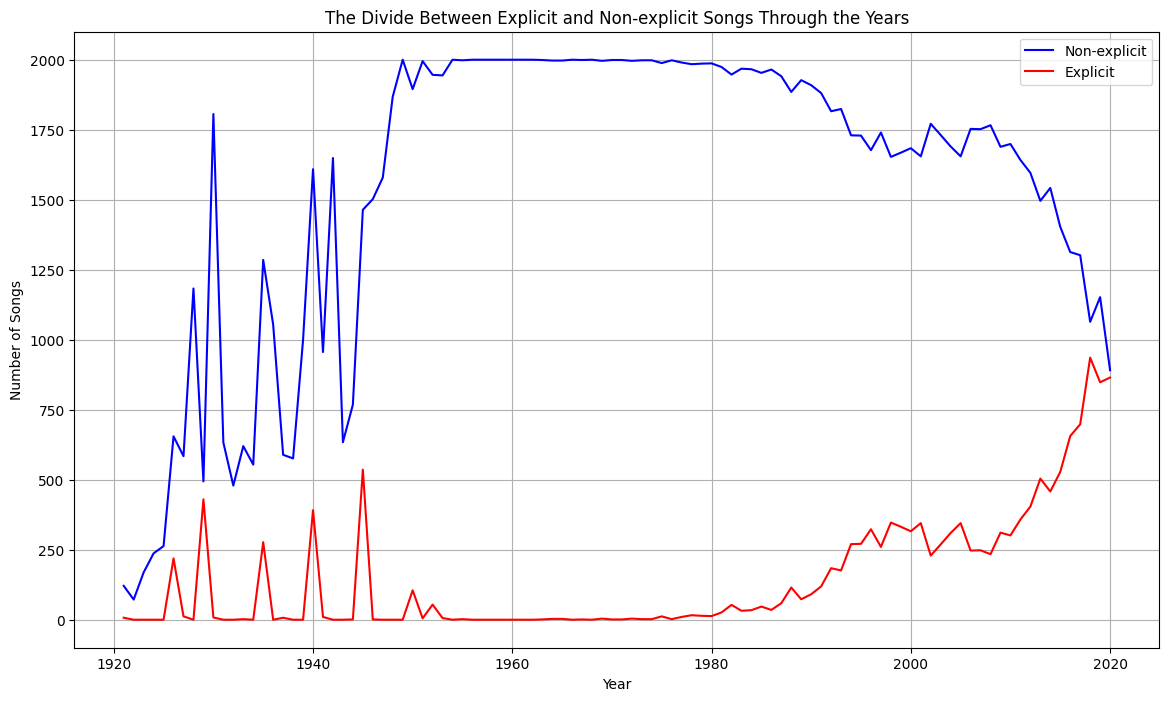

In [ ]:
explicit_counts = df_spotify.groupby(['year', 'explicit']).size().unstack(fill_value=0)

plt.figure(figsize=(14, 8))

plt.plot(explicit_counts.index, explicit_counts[0], label='Non-explicit', color='blue')
plt.plot(explicit_counts.index, explicit_counts[1], label='Explicit', color='red')

plt.title('The Divide Between Explicit and Non-explicit Songs Through the Years')
plt.xlabel('Year')
plt.ylabel('Number of Songs')
plt.legend()
plt.grid(True)
plt.show()